## Урок 4. Непрерывные случайные величины. Функция распределения и плотность распределения вероятностей. Равномерное и нормальное распределение. Центральная предельная теорема

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

from sympy.solvers import solve
from sympy import Symbol
from scipy.stats import norm

In [2]:
def get_md(a, b):
    m_x = (a + b) / 2
    d_x = (b - a)**2 / 12
    print(f'M(X) = {m_x:.4f}, D(X) = {d_x:.4f}')
    return m_x, d_x


def get_p(num, first=None, second=None):
    
    if first and not second:
        s = (first - m_x) / std_x
        p = 1 - norm.cdf(s)
        message = f'от {first}см и выше'

    if not first and second:
        s = (second - m_x) / std_x
        p = norm.cdf(s)
        message = f'до {second}см и ниже'

    if first and second:
        if second > first:
            s1 = (first - m_x) / std_x
            p1 = 1- norm.cdf(s1)
            s2 = (second - m_x) / std_x
            p2 = 1- norm.cdf(s2)
            p = p1 - p2
            message = f'от {first}см до {second}см'
        else:
            s1 = (first - m_x) / std_x
            p1 = 1 - norm.cdf(s1)
            s2 = (second - m_x) / std_x
            p2 = norm.cdf(s2)
            p = p1 + p2
            message = f'не выше {second}см и не ниже {first}см'
    
    print(f'{num} Человек имеет рост {message} с вероятностью P = {p:.4f}')

### 1. Случайная непрерывная величина A имеет равномерное распределение на промежутке (200, 800]. Найдите ее среднее значение и дисперсию.

In [3]:
display(Markdown(f'**Ответ:**'))
m_x, d_x = get_md(200, 800)

**Ответ:**

M(X) = 500.0000, D(X) = 30000.0000


### 2. О случайной непрерывной равномерно распределенной величине B известно, что ее дисперсия равна 0.2. Можно ли найти правую границу величины B и ее среднее значение зная, что левая граница равна 0.5? Если да, найдите ее.

In [4]:
d_x = 0.2
a = 0.5
b = Symbol('b')

list_b = solve((b - a)**2 / 12 - d_x)
for num in list_b:
    if num > a:
        b = num

print(f'Правая граница b = {b:.4f}')

Правая граница b = 2.0492


In [5]:
display(Markdown(f'**Ответ (и проверка):**'))
m_x, d_x = get_md(a, b)

**Ответ (и проверка):**

M(X) = 1.2746, D(X) = 0.2000


### 3 Непрерывная случайная величина X распределена нормально и задана плотностью распределения<br> ```f(x) = (1 / (4 * sqrt(2*pi))) * (exp(-((x+2)**2) / 32))```<br> Найдите:<br>а). M(X), б). D(X), в). std(X) (среднее квадратичное отклонение)

**Перепишем формулу с разложеним на множители (с заменами) и построим заданное распределение**

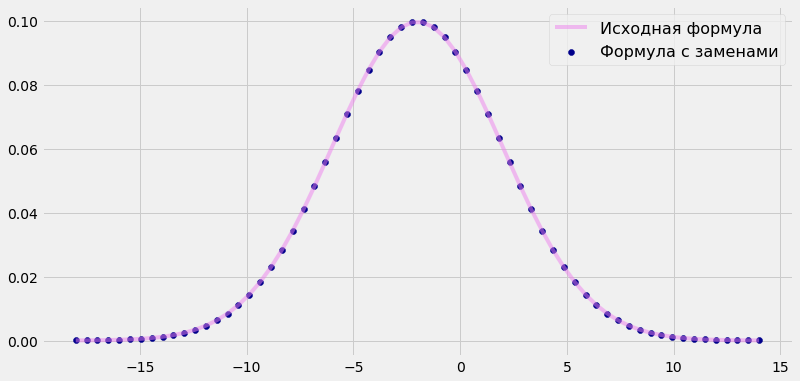

**Ответ:**

а). M(X) = -2,  б). D(X) = 16,  в). std(X) = 4


In [6]:
m_x = -2 # а
d_x = 16 # б
std_x = 4 # в

x = np.linspace(m_x-std_x*4, m_x+std_x*4, num = 64, endpoint = True)

# Исходная формула
y = (1 / (4 * np.sqrt(2*np.pi))) * (np.exp(-((x+2)**2) / 32))

# Формула с заменами
y1 = (1 / (std_x * np.sqrt(2*np.pi))) * (
    np.exp(-((x - m_x)**2) / (2 * std_x**2)))

plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [12, 6]
plt.plot(x, y, c='violet', alpha=0.5, label='Исходная формула')
plt.scatter(x, y1, c='darkblue', label='Формула с заменами')
plt.legend(loc="upper right", fontsize=16)
plt.grid(True)
plt.show()
display(Markdown(f'**Ответ:**'))
print(f'а). M(X) = {m_x},  б). D(X) = {d_x},  в). std(X) = {std_x}')

### 4. Рост взрослого населения города X имеет нормальное распределение. Причем, средний рост равен 174 см, а среднее квадратичное отклонение равно 8 см. Какова вероятность того, что случайным образом выбранный взрослый человек имеет рост:<br>а). больше 182 см<br>б). больше 190 см<br>в). от 166 см до 190 см<br>г). от 166 см до 182 см<br>д). от 158 см до 190 см<br>е). не выше 150 см или не ниже 190 см<br>ё). не выше 150 см или не ниже 198 см<br>ж). ниже 166 см.

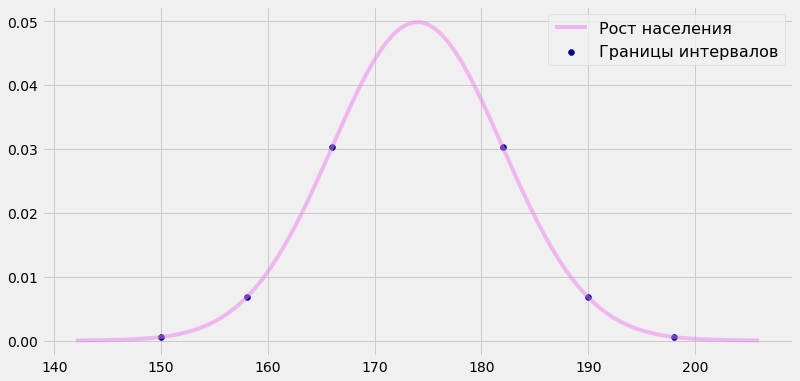

In [7]:
m_x = 174
std_x = 8

x = np.linspace(m_x-std_x*4, m_x+std_x*4, num = 100, endpoint = True)
x1 = np.array([150, 158, 166, 182, 190, 198])

y = (1 / (std_x * np.sqrt(2*np.pi))) * (
    np.exp(-((x - m_x)**2) / (2 * std_x**2)))
y1 = (1 / (std_x * np.sqrt(2*np.pi))) * (
    np.exp(-((x1 - m_x)**2) / (2 * std_x**2)))

plt.plot(x, y, c='violet', alpha=0.5, label='Рост населения')
plt.scatter(x1, y1, c='darkblue', label='Границы интервалов')
plt.legend(loc="upper right", fontsize=16)
plt.grid(True)

In [8]:
initial_data = [
    ('а).', 182, None),
    ('б).', 190, None),
    ('в).', 166, 190),
    ('г).', 166, 182),
    ('д).', 158, 190),
    ('е).', 190, 150),
    ('ё).', 198, 150),
    ('ж).', None, 166)
]

In [9]:
display(Markdown(f'**Ответы:**'))
for i in initial_data:
    get_p(*i)

**Ответы:**

а). Человек имеет рост от 182см и выше с вероятностью P = 0.1587
б). Человек имеет рост от 190см и выше с вероятностью P = 0.0228
в). Человек имеет рост от 166см до 190см с вероятностью P = 0.8186
г). Человек имеет рост от 166см до 182см с вероятностью P = 0.6827
д). Человек имеет рост от 158см до 190см с вероятностью P = 0.9545
е). Человек имеет рост не выше 150см и не ниже 190см с вероятностью P = 0.0241
ё). Человек имеет рост не выше 150см и не ниже 198см с вероятностью P = 0.0027
ж). Человек имеет рост до 166см и ниже с вероятностью P = 0.1587


### 5. На сколько сигм (средних квадратичных отклонений) отклоняется рост человека, равный 190 см, от математического ожидания роста в популяции, в которой M(X) = 178 см и D(X) = 25 кв.см?

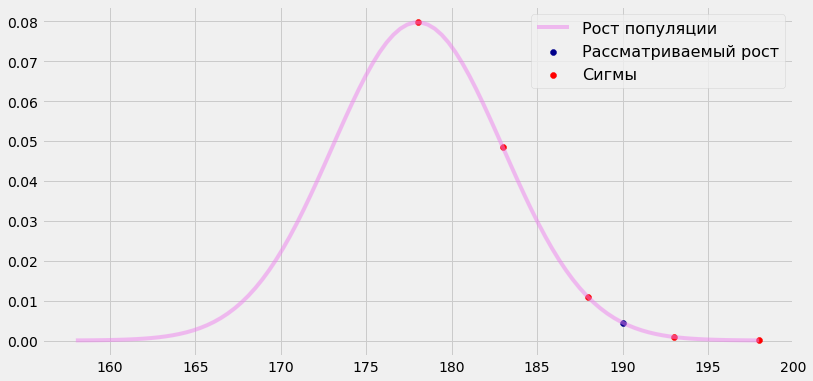

In [10]:
X = 190
m_x = 178
d_x = 25
std_x = d_x**(1/2)

x = np.linspace(m_x-std_x*4, m_x+std_x*4, num = 100, endpoint = True)
x1 = np.array([X])
x2 = np.linspace(m_x, m_x+std_x*4, num = 5, endpoint = True)

y = (1 / (std_x * np.sqrt(2*np.pi))) * (
    np.exp(-((x - m_x)**2) / (2 * std_x**2)))
y1 = (1 / (std_x * np.sqrt(2*np.pi))) * (
    np.exp(-((x1 - m_x)**2) / (2 * std_x**2)))
y2 = (1 / (std_x * np.sqrt(2*np.pi))) * (
    np.exp(-((x2 - m_x)**2) / (2 * std_x**2)))

plt.plot(x, y, c='violet', alpha=0.5, label='Рост популяции')
plt.scatter(x1, y1, c='darkblue', label='Рассматриваемый рост')
plt.scatter(x2, y2, c='red', label='Сигмы')
plt.legend(loc="upper right", fontsize=16)
plt.grid(True)

In [11]:
display(Markdown(f'**Ответ:**'))
(X - m_x) / std_x

**Ответ:**

2.4